In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datathon2023/sample_submission.csv
/kaggle/input/datathon2023/test_x.csv
/kaggle/input/datathon2023/train.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/datathon2023/train.csv')
test_df = pd.read_csv('/kaggle/input/datathon2023/test_x.csv')

In [3]:
train_df.head(20)

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459
5,5,Kadın,18-30,Bekar,Yüksekokul Mezunu,Düzenli ve Ücretli Bir İşi Var,332489.316371,Büyük Şehir,Giyim,9218.994557,56.626868,Etmiyor,obek_8,216.332207
6,6,Kadın,18-30,Evli,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,256538.898810,Kırsal,Ev ve Mobilya,6013.405491,15.929857,Etmiyor,obek_3,19.248434
7,7,Kadın,31-40,Bekar,Lise Mezunu,Kendi İşinin Sahibi,213630.355636,Küçük Şehir,Ev ve Mobilya,3960.361517,8.913887,Etmiyor,obek_5,102.394323
8,8,Erkek,51-60,Bekar,Üniversite Mezunu,Düzenli ve Ücretli Bir İşi Var,479593.473447,Köy veya Kasaba,Elektronik ve Teknolojik Ürünler,39574.601258,25.685715,Etmiyor,obek_3,56.322893
9,9,Kadın,51-60,Evli,Üniversite Mezunu,Emekli,477359.775587,Küçük Şehir,Giyim,41555.832293,27.871027,Etmiyor,obek_6,44.838758


In [4]:
# Checking for missing values
missing_values = train_df.isnull().sum()

# Distribution of the target variable
target_distribution = train_df['Öbek İsmi'].value_counts()

missing_values, target_distribution

(index                                         0
 Cinsiyet                                      0
 Yaş Grubu                                     0
 Medeni Durum                                  0
 Eğitim Düzeyi                                 0
 İstihdam Durumu                               0
 Yıllık Ortalama Gelir                         0
 Yaşadığı Şehir                                0
 En Çok İlgilendiği Ürün Grubu                 0
 Yıllık Ortalama Satın Alım Miktarı            0
 Yıllık Ortalama Sipariş Verilen Ürün Adedi    0
 Eğitime Devam Etme Durumu                     0
 Öbek İsmi                                     0
 Yıllık Ortalama Sepete Atılan Ürün Adedi      0
 dtype: int64,
 obek_4    720
 obek_8    717
 obek_5    706
 obek_3    695
 obek_7    695
 obek_1    692
 obek_6    688
 obek_2    547
 Name: Öbek İsmi, dtype: int64)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
submission_ids = test_df['index']

In [7]:
# Drop the index column as it's not needed
train_df.drop(columns=['index'], inplace=True)
test_df.drop(columns=['index'], inplace=True)

In [8]:
X = train_df.drop('Öbek İsmi', axis=1)
y = train_df['Öbek İsmi']

In [9]:
categorical_features = ['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi', 'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu', 'Eğitime Devam Etme Durumu']

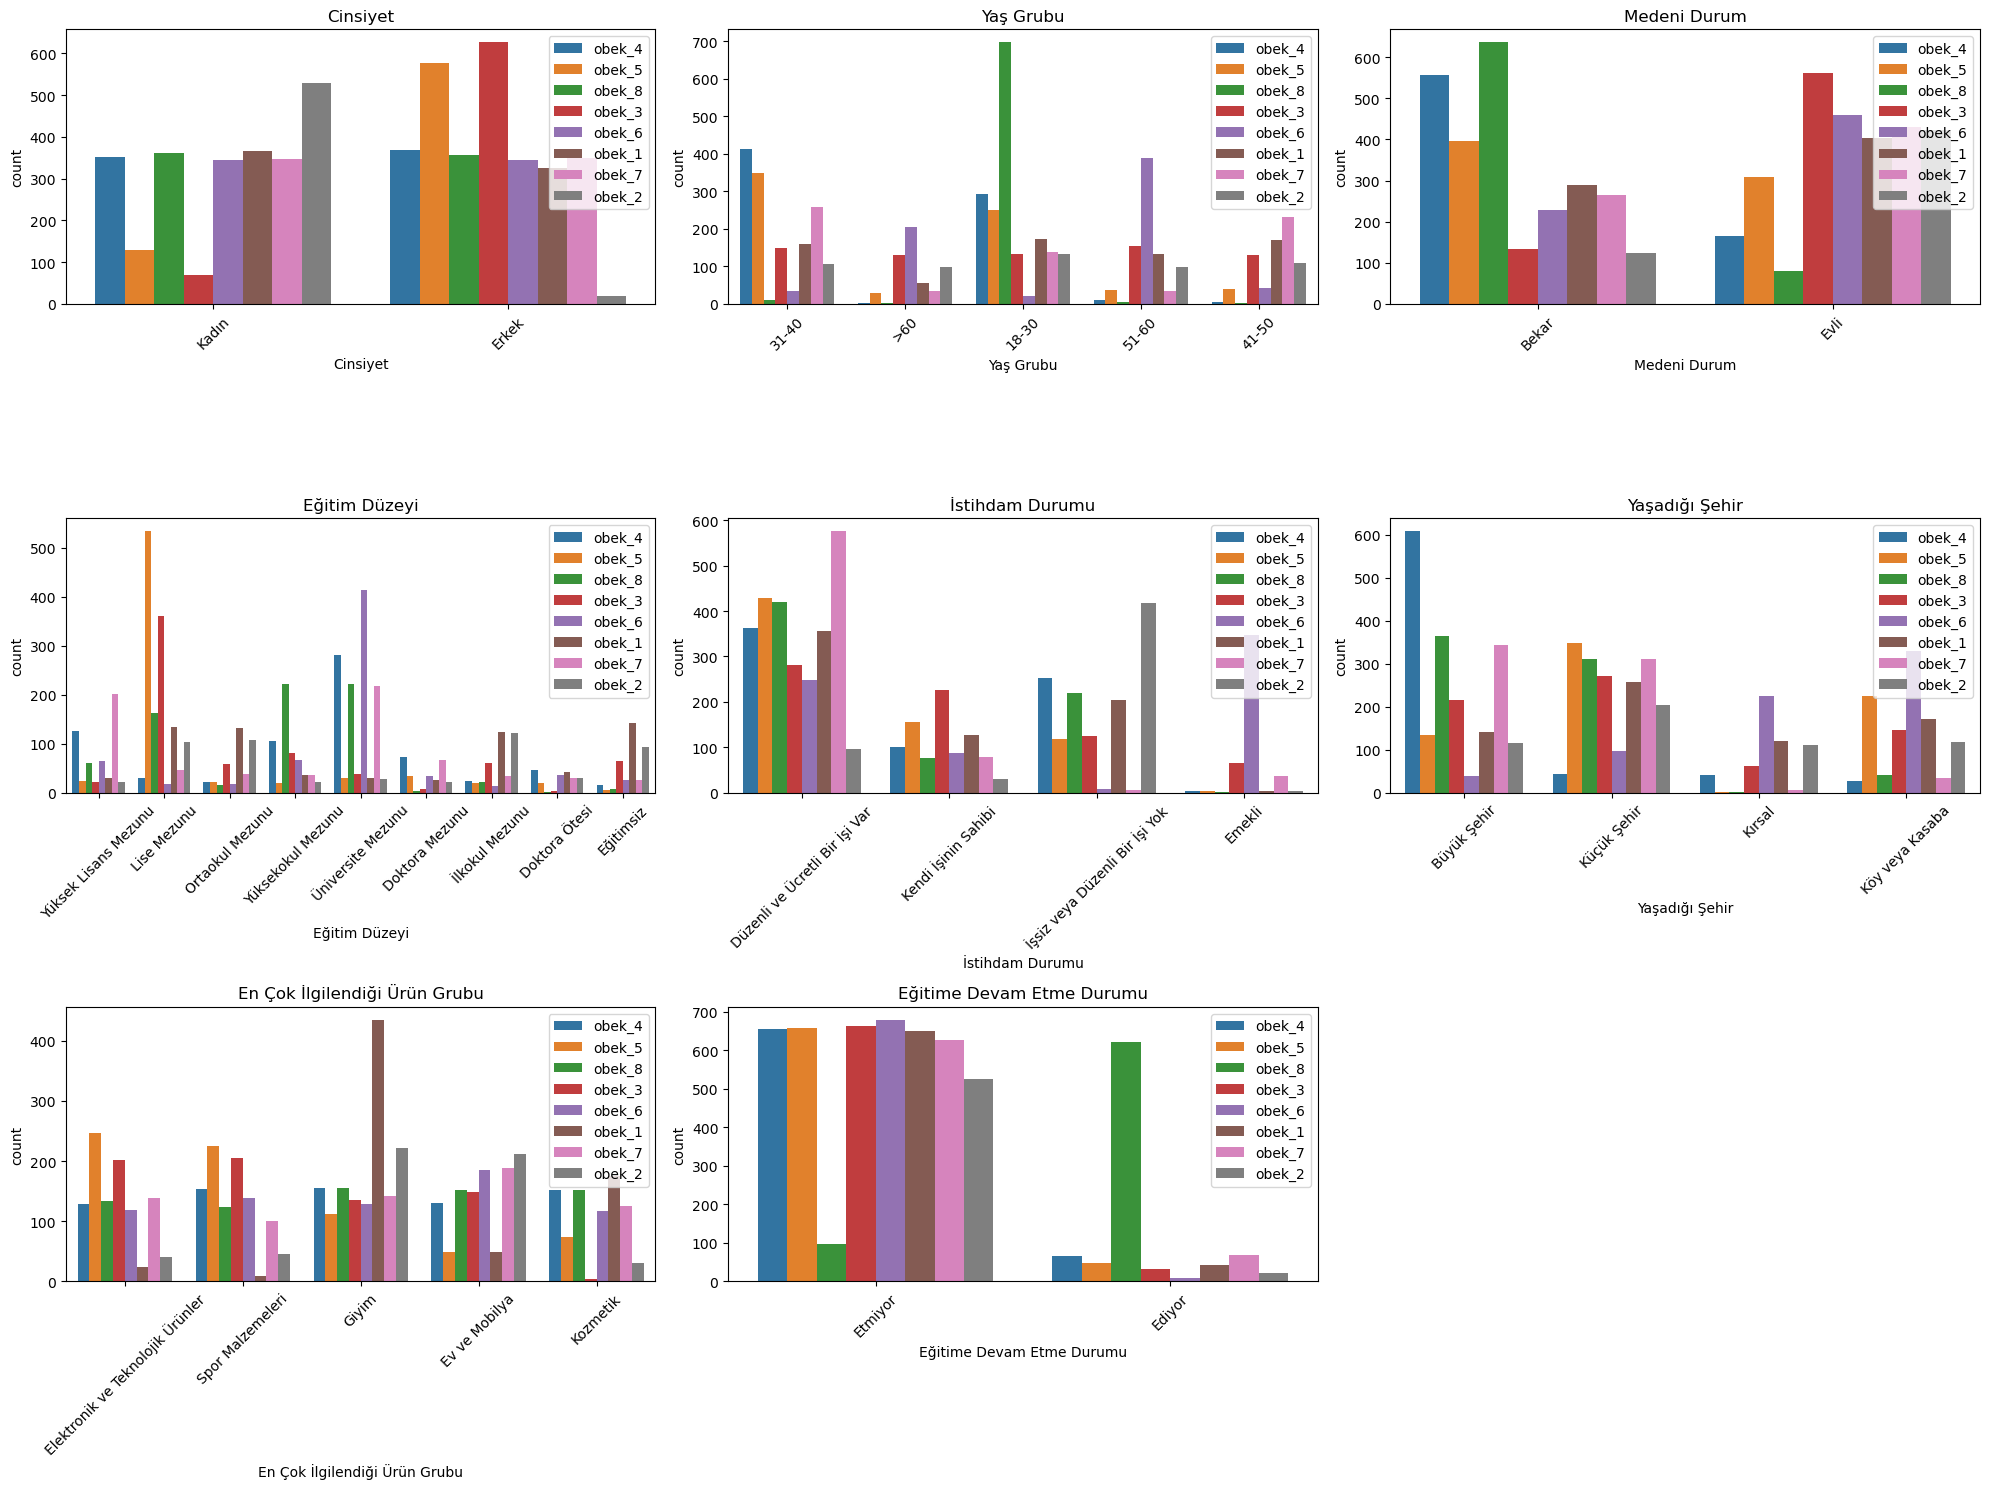

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine original train and validation data for visualization
visual_data_original = pd.concat([X, y], axis=1)

# Visualizing categorical features against the target
plt.figure(figsize=(20, 15))
for idx, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, idx)
    sns.countplot(data=visual_data_original, x=feature, hue='Öbek İsmi')
    plt.title(feature)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

* **Cinsiyet**: Bazı öbeklerde cinsiyet farklılığı görünüyor. Örneğin öbek 2'de kadın oranı fazlayken, öbek 5 ve öbek 3'de erkek oranı fazla. 
* **Yaş Grubu**: öbek 1, öbek 2, öbek 3'de yaş aralığı eşit oranda dağılmış gibi görünüyor. 
*    Öbek 4 ve öbek 5'de 18-40 yaş arası çoğunlukta. Öbek 6'da 51-60 ve 60 üstü yaş aralığı çoğunlukta görünüyor. öbek 7'de 31-50 yaş aralığı fazla görünüyor ve arkasından 18-30 yaş aralığı geliyor.
*    Öbek 8'de 18-30 yaş aralığı ezici çoğunlukta.
* **Medeni Durum**: öbek 4 ve öbek 8'de bekarlar fazla iken, öbek 3, öbek 6, öbek 1 öbek 7 ve öbek 2'de evliler fazla görünüyor. öbek 5'de eşite yakın bir dağılım var.
* **Eğitim Düzeyi**: öbek 1 ve öbek 2'de eğitimsiz, ilkokul, ortaokul ve lise mezunları fazlalıkta. öbek 3'de, öbek 5'de ve öbek 8'de lise mezunları fazlalıkta. öbek 4'de ve öbek 6'da üniversite mezunları fazlalıkta. öbek 7'de üniversite ve yüksek lisans mezunları fazlalıkta.
* **İstihdam Durumu**: Emekliler öbek 6'da çoğunlukta. öbek 7 ve öbek 6'da işsiz veya düzenli işi olmayanlar azınlıkta. düzenli ve ücretli bir işi olanlar öbek 2'de azınlıkta, diğer öbeklerde orantılı bir dağılım var. 
* **Yaşadığı Şehir**: Büyük şehirde yaşayanların çoğunluğu öbek 4'de. öbek 6'nın çoğunluğu kırsal, köy veya kasabada yaşıyor. 
* **Eğitime Devam**: Öbek 8 eğitime devam ediyor.


* **Öbek 1**: Eşit cinsiyet, eşit yaş ama 60 yaş üstü azınlıkta, evliler fazla, eğitimsiz, ilkokul, ortaokul, lise mezunları, emekli ve kendi işinin sahibi olanlar az, yaşadıkları şehirler eşit sayılır, eğitime devam etmiyorlar, en çok giyim ile ilgileniyorlar. (memur ve işçi kesimi)
* **Öbek 2**: Kadın fazlalıkta, yaş dağılımı eşit, evliler fazla, eğitimsiz, ilkokul, ortaokul ve lise mezunları fazla, işsizler, yaşadıkları şehirler eşit dağılım, eğitime devam yok, giyim ev ve mobilya en çok alınanlar (ev hanımları)
* **Öbek 3**: Erkek, yaş aralığı eşit, evli, lise mezunu, düzenli işi var veya kendi işinin sahibi, küçük şehir biraz çoğunlukta, eğitime devam etmiyor, kozmetik almıyor (erkekler)
* **Öbek 4**: Eşit cinsiyet, 18-40 yaş aralığı, bekar, üniversite mezunu, düzenli ve ücretli bir işi var ve işsizler çoğunlukta, büyük şehirde yaşıyorlar, ilgilenilen ürünler eşit, eğitime devam etmiyor (mezun çalışan)
* **Öbek 5**: Erkek, 18-40 yaş aralığı, medeni durum eşit gibi, lise mezunu, düzenli ve ücretli işleri var, küçük şehir ya da köy veya kasabada yaşıyorlar, eğitime devam etmiyorlar, elektronik ve teknolojik ve spor malzemeleri alıyorlar (öbek 3 ile aynı gibi)
* **Öbek 6**: Eşit cinsiyet, 51-60 ve 60 yaş üstü, evlilik çoğunlukta, üniversite mezunları, emekli ya da düzenli ve ücretli işleri var, kırsal, köy veya kasabada yaşıyorlar, her ürünle eşit ilgeniyorlar, eğitime devam yok (emekliler)
* **Öbek 7**: Eşit cinsiyet, 31-50 yaş aralığı fazla, evliler, üniversite ve yüksek lisans mezunları, düzenli işleri var, büyük ve küçük şehirlerde yaşıyorlar, ev ve mobilya ilgileniyorlar, eğitime devam etmiyorlar (beyaz yaka)
* **Öbek 8**: Eşit cinsiyet, 18-30 yaş, bekar, lise, yüksekokul, üniversite mezunları, düzenli ve ücretli işleri var, büyük ve küçük şehirlerde yaşıyorlar, ilgilendikleri ürünler orantılı, eğitime devam ediyorlar

In [11]:
# Encoding categorical features
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    label_encoders[column] = le

In [12]:
# Encoding categorical features
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    test_df[column] = le.fit_transform(test_df[column])
    label_encoders[column] = le

In [13]:
# Encoding the target variable
target_encoder = LabelEncoder()
train_df['Öbek İsmi'] = target_encoder.fit_transform(train_df['Öbek İsmi'])

In [14]:
# Splitting data into features and target
X = train_df.drop('Öbek İsmi', axis=1)
y = train_df['Öbek İsmi']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((4368, 12), (1092, 12))

In [15]:
test_data_scaled = scaler.transform(test_df)

In [16]:
numerical_features = ['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi']

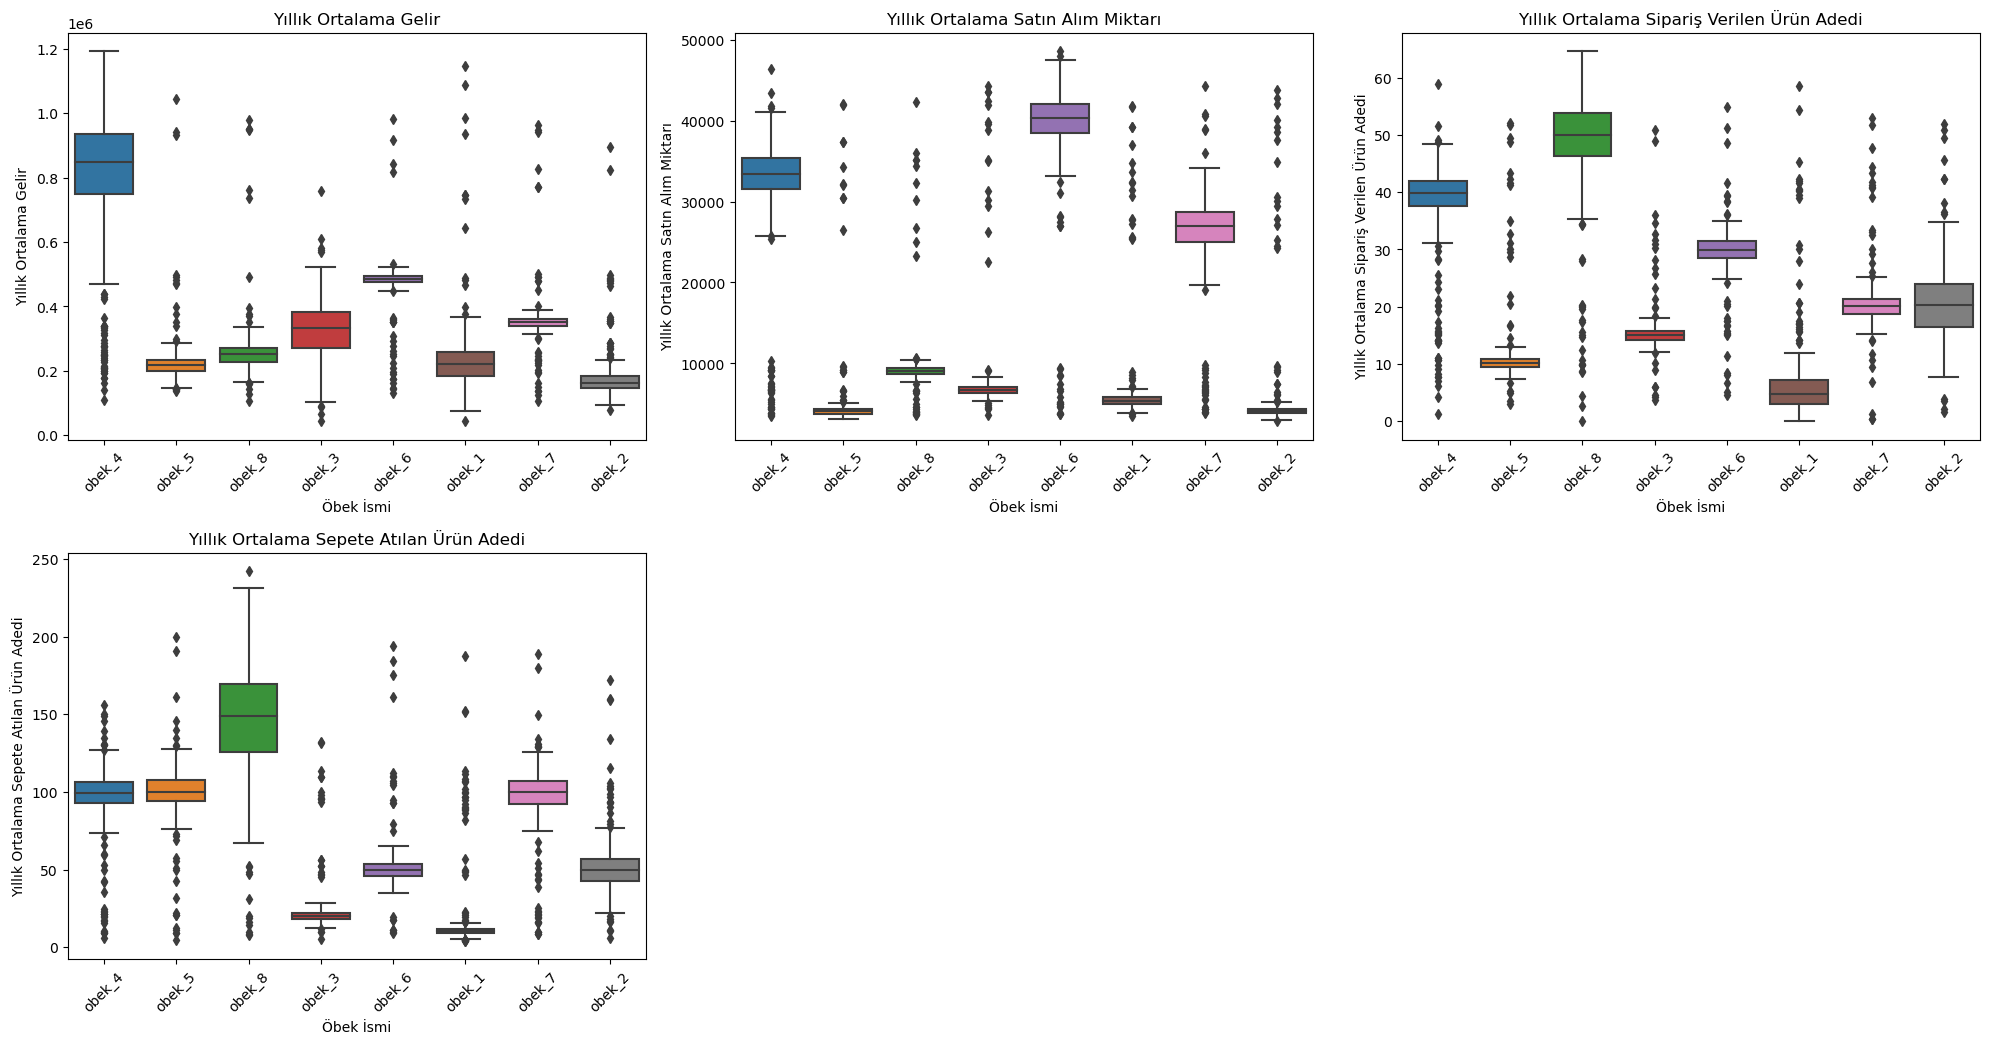

In [17]:
# Visualizing numerical features against the target
plt.figure(figsize=(20, 15))
for idx, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, idx)
    sns.boxplot(data=visual_data_original, x='Öbek İsmi', y=feature)
    plt.title(feature)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


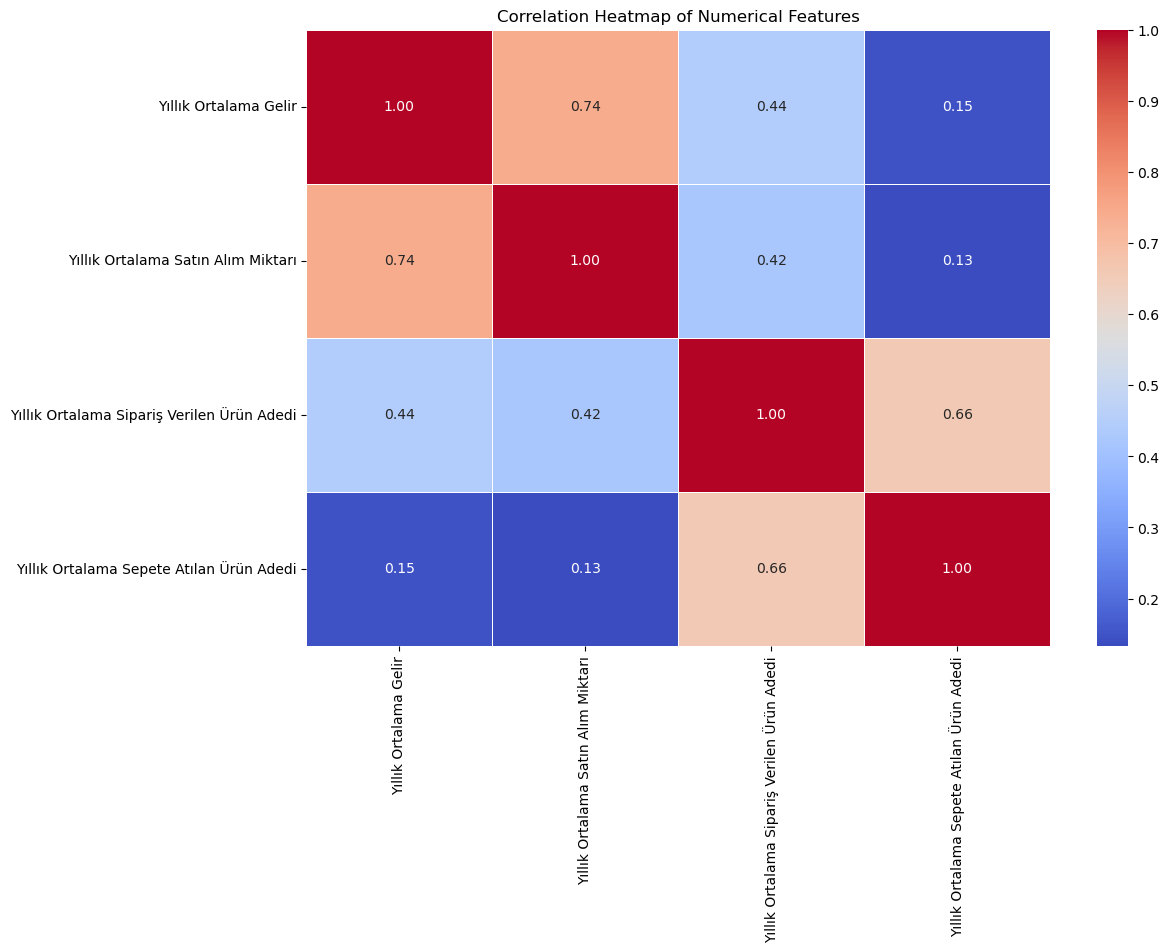

In [18]:
# Correlation heatmap
correlation_matrix = train_df[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [19]:
train_df.head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,1,1,0,5,0,748266.440879,0,0,32010.900881,37.310644,1,3,102.936904
1,0,4,1,3,2,246298.609605,2,4,4145.729891,11.554851,1,4,82.176053
2,0,0,0,3,0,268582.732360,2,2,9924.379414,55.353236,0,7,141.661426
3,0,3,1,3,2,327721.837865,3,2,6417.780714,15.417239,1,2,17.097397
4,0,1,1,4,3,397431.626948,0,2,7886.663061,14.689837,1,2,20.470459


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForest Classifier
clf = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=target_encoder.classes_)

accuracy, classification_rep

(0.9615384615384616,
 '              precision    recall  f1-score   support\n\n      obek_1       0.96      0.95      0.96       135\n      obek_2       0.97      0.96      0.96       114\n      obek_3       0.97      0.99      0.98       145\n      obek_4       0.98      0.93      0.95       134\n      obek_5       0.96      0.99      0.97       139\n      obek_6       0.94      0.98      0.96       128\n      obek_7       0.97      0.94      0.95       148\n      obek_8       0.95      0.97      0.96       149\n\n    accuracy                           0.96      1092\n   macro avg       0.96      0.96      0.96      1092\nweighted avg       0.96      0.96      0.96      1092\n')

In [21]:
y_pred

array([1, 0, 0, ..., 2, 6, 0])

In [22]:
test_predictions = clf.predict(test_data_scaled)
test_predictions_labels = target_encoder.inverse_transform(test_predictions)

In [23]:
test_predictions

array([2, 2, 1, ..., 6, 4, 5])

In [24]:
submission_df = pd.DataFrame({'id': submission_ids, 'Öbek İsmi': test_predictions_labels})
submission_df.to_csv('submission.csv', index=False)